# O'Sullivan / Koven method

In [ ]:
# from IPython.display import Markdown, display
# display(Markdown("TracebilityText.md"))

### Loading required packages  and functions

In [358]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from functools import lru_cache
import general_helpers as gh
from bgc_md2.resolve.mvars import (
    CompartmentalMatrix,
    InputTuple,
    StateVariableTuple
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Selecting models to compare

In [335]:
model_names={
    "ab_classic":"CLASSIC",  
    "clm5":"CLM5.0",
    #"kv_ft_dlem": "DLEM", 
    #"bian_ibis2":"IBIS",    
    "cj_isam": "ISAM",    
    "isba-ctrip":"ISBA-CTRIP",    
    "jsbach":"JSBACH",
    "yz_jules": "JULES-ES-1p0",    
    #"lpj-guess":"LPJ-GUESS",
    "lpjwsl":"LPJ",
    "lpx-bern":"LPX-Bern",
    #"ORCHIDEE-V2":"OCN",    
    "ORCHIDEE":"ORCHIDEE",
    "ORCHIDEE-CNP":"ORCHIDEE-CNP",    
    "ORCHIDEEv3":"ORCHIDEEv3",
    "Aneesh_SDGVM":"SDGVM",
    "kv_visit2": "VISIT",
    "jon_yib": "YIBs"    
}
model_folders=[(k) for k in model_names]
m_names=list(model_names.values())
experiment_names_S2=list()
for name in m_names:
    experiment_names_S2.append(name + "_S2_") 
experiment_names_S3=list()
for name in m_names:
    experiment_names_S3.append(name + "_S3_") 

# colors require installation of the "seaborn" package (not part of bgc_md2)
import seaborn as sns
cols = sns.color_palette("tab20", len(m_names))
model_cols = {m_names[i]: cols[i] for i in range(len(m_names))}

### Loading TRENDY data and model parameters

In [336]:
vars_all_list_S2=gh.get_vars_all_list(model_folders, experiment_names_S2)
vars_all_list_S3=gh.get_vars_all_list(model_folders, experiment_names_S3)

ab_classic

 Found cached global mean files. If you want to recompute the global means
            remove the following files: 
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\CLASSIC\CLASSIC_S2_gm_all_vars.nc
clm5

 Found cached global mean files. If you want to recompute the global means
            remove the following files: 
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\CLM5\CLM5.0_S2_gm_all_vars.nc
cj_isam

 Found cached global mean files. If you want to recompute the global means
            remove the following files: 
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\ISAM\ISAM_S2_gm_all_vars.nc
isba-ctrip

 Found cached global mean files. If you want to recompute the global means
            remove the following files: 
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\ISBA_CTRIP\ISBA-CTRIP_S2_gm_all_vars.nc
jsbach

 Found cached global mean files. If you want to recompute the glo

In [337]:
vars_all_list_S2[5].gpp[119]

0.002978339791738376

In [338]:
# define same step size for all models (in days)
delta_t_val=30

In [339]:
all_comp_dict_S2=gh.get_components_from_output(model_names=model_names,
             vars_all_list=vars_all_list_S2,
             delta_t_val=delta_t_val, 
             #model_cols=model_cols,
             part=1,
             #averaging=12*30//delta_t_val, # yearly averaging
             #averaging=30//delta_t_val, # monthly averaging
             #overlap=True
             )
all_comp_dict_S3=gh.get_components_from_output(model_names=model_names,
             vars_all_list=vars_all_list_S3,
             delta_t_val=delta_t_val, 
             #model_cols=model_cols,
             part=1,
             #averaging=12*30//delta_t_val, # yearly averaging
             #averaging=30//delta_t_val, # monthly averaging
             #overlap=True
             )

120
Getting traceable components for ab_classic...
(100,)
(100,)
(100,)
(100,)
(100,)
199 299
199 299
Getting traceable components for clm5...
(100,)
(100,)
(100,)
(100,)
(100,)
200 300
200 300
Getting traceable components for cj_isam...
(100,)
(100,)
(100,)
(100,)
(100,)
200 300
200 300
Getting traceable components for isba-ctrip...
(100,)
(100,)
(100,)
(100,)
(100,)
200 300
200 300
Getting traceable components for jsbach...
(100,)
(100,)
(100,)
(100,)
(100,)
200 300
200 300
Getting traceable components for yz_jules...
(100,)
(100,)
(100,)
(100,)
(100,)
200 300
200 300
Getting traceable components for lpjwsl...
(100,)
(100,)
(100,)
(100,)
(100,)
200 300
200 300
Getting traceable components for lpx-bern...
(100,)
(100,)
(100,)
(100,)
(100,)
200 300
200 300
Getting traceable components for ORCHIDEE...
(100,)
(100,)
(100,)
(100,)
(100,)
200 300
200 300
Getting traceable components for ORCHIDEE-CNP...
(100,)
(100,)
(100,)
(100,)
(100,)
199 299
199 299
Getting traceable components for ORCH

### Plots of traceable components and their uncertainty

In [340]:
plt.rcParams.update({'font.size': 14})

In [341]:
all_comp_dict_S2["Mean"]["cVeg"].shape

(100,)

In [342]:
# for name in m_names:
#     print(name)
#     print(all_comp_dict_S3[name]["rt"].mask)
all_comp_dict_S3["ISAM"]["cVeg"]

masked_array(data=[4.80306164, 4.80200744, 4.79573208, 4.79463894,
                   4.79795556, 4.79544189, 4.79383705, 4.79600094,
                   4.79518393, 4.79491134, 4.79410848, 4.79295009,
                   4.7906925 , 4.79049085, 4.79333446, 4.79576108,
                   4.79444401, 4.79800114, 4.80202362, 4.80187834,
                   4.80287334, 4.80602157, 4.80692527, 4.80817834,
                   4.80494889, 4.80401893, 4.80203137, 4.8025699 ,
                   4.79969005, 4.79329795, 4.79239936, 4.79248378,
                   4.79028101, 4.78737973, 4.78840925, 4.78704273,
                   4.78246552, 4.78152876, 4.78039334, 4.78035834,
                   4.78101422, 4.78237539, 4.77671992, 4.77569065,
                   4.7736779 , 4.76751092, 4.76455133, 4.76077253,
                   4.75991413, 4.75742479, 4.75927881, 4.82255131,
                   4.74821581, 4.74242463, 4.74001191, 4.73756066,
                   4.73530655, 4.73222864, 4.72517636, 4.72189

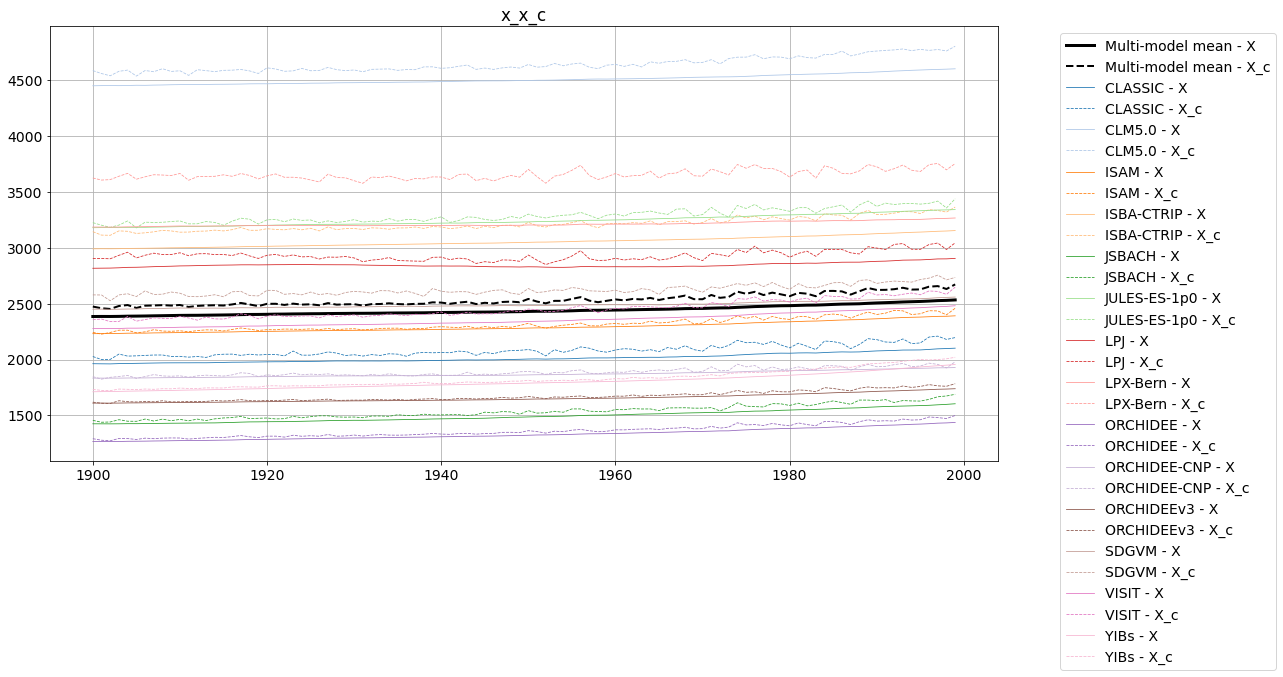

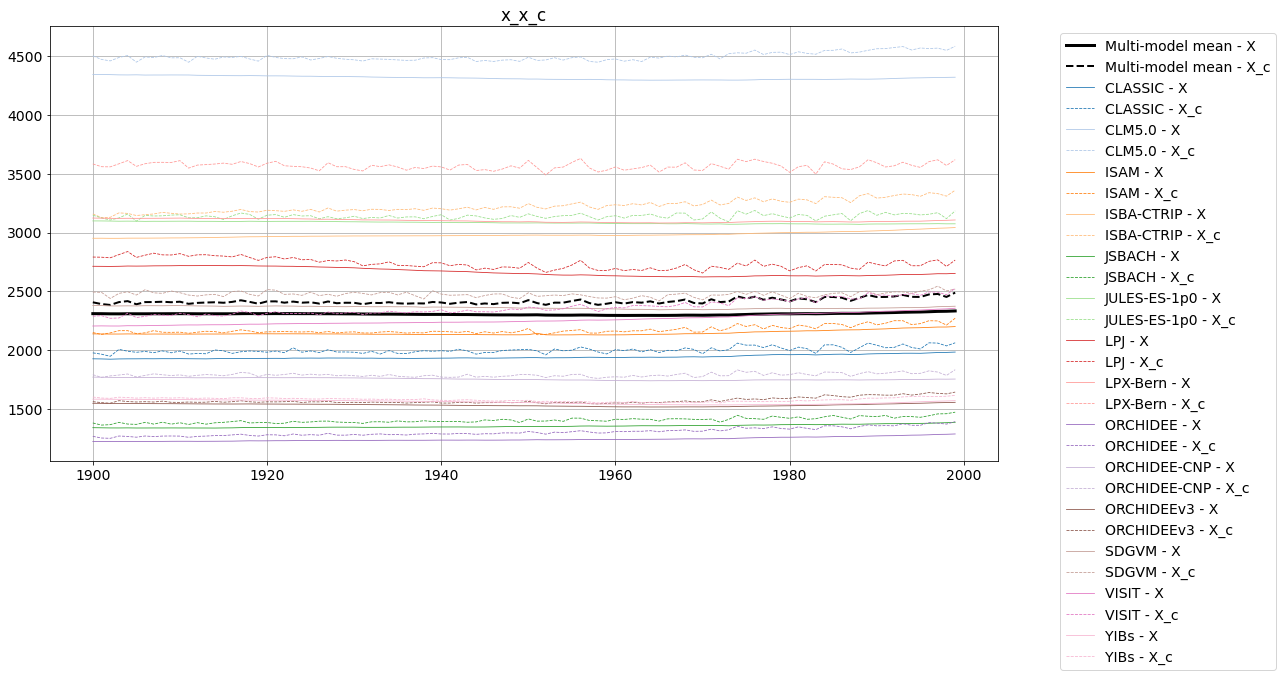

In [343]:
x_x_c1,sigma_x_x_c1=gh.plot_traceable_component(
    all_comp_dict_S2,
    "x_x_c",
    model_cols,
    #delta=True,
)
x_x_c2,sigma_x_x_c2=gh.plot_traceable_component(
    all_comp_dict_S3,
    "x_x_c",
    model_cols,
    #delta=True,
)

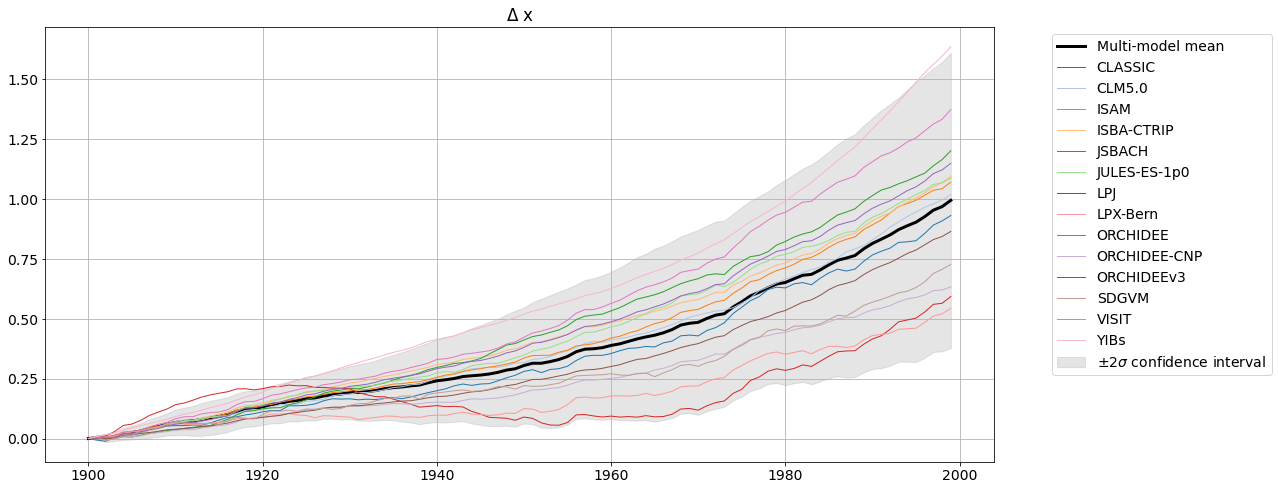

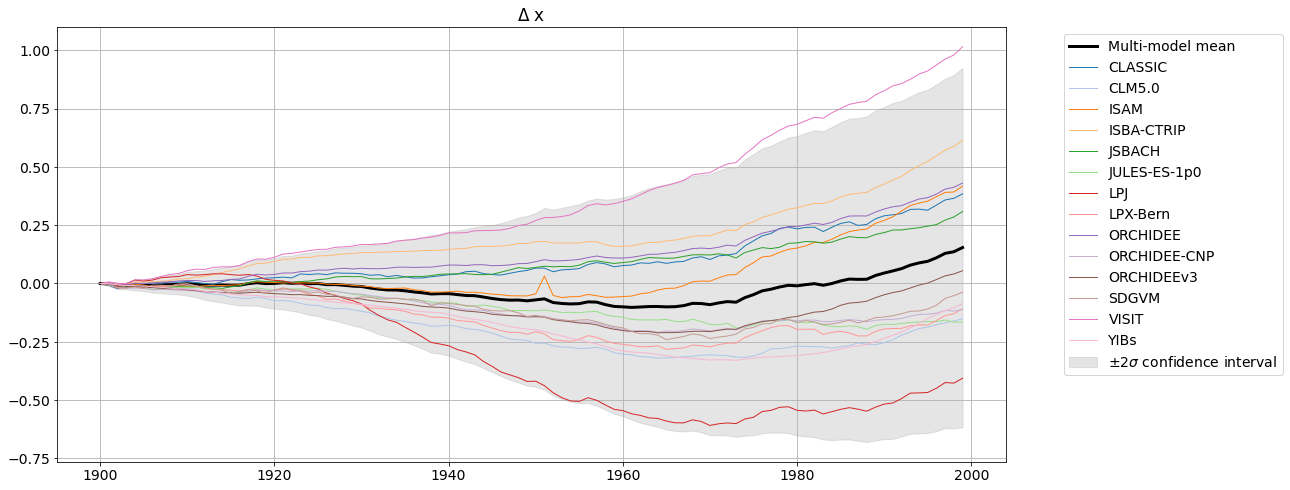

In [344]:
x1,sigma_x1=gh.plot_traceable_component(
    all_comp_dict_S2,
    "x",
    model_cols,
    delta=True,
)
x2,sigma_x2=gh.plot_traceable_component(
    all_comp_dict_S3,
    "x",
    model_cols,
    delta=True,
)

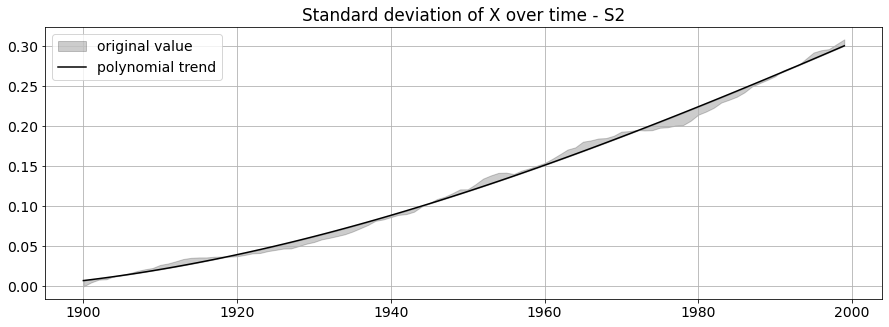

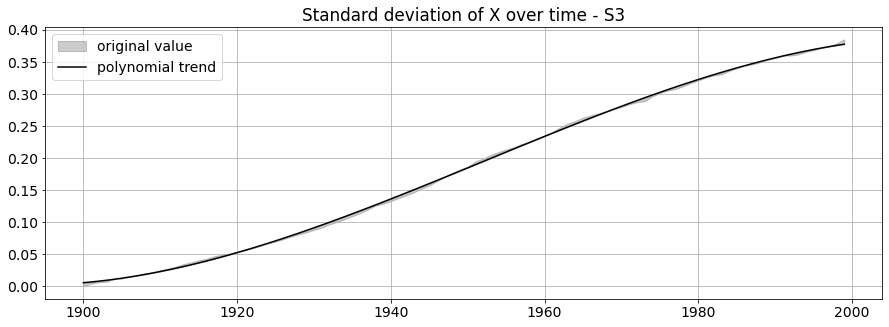

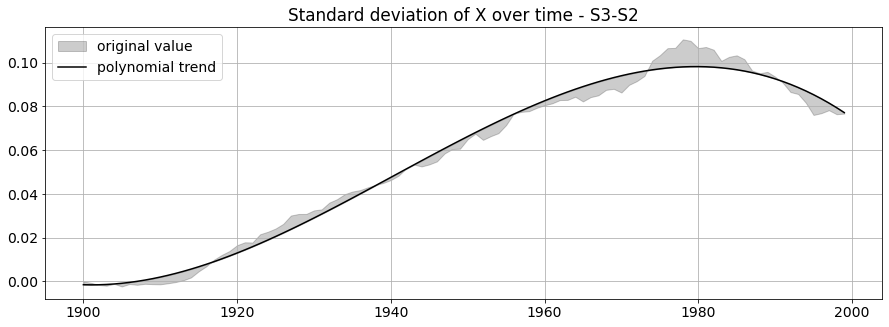

In [345]:
times=all_comp_dict_S2["Times"]
var=sigma_x1
gh.plot_single_trend(var,times,3,"Standard deviation of X over time - S2")

times=all_comp_dict_S3["Times"]
var=sigma_x2
gh.plot_single_trend(var,times,3, "Standard deviation of X over time - S3")

times=all_comp_dict_S3["Times"]
var=sigma_x2-sigma_x1
gh.plot_single_trend(var,times,3, "Standard deviation of X over time - S3-S2")

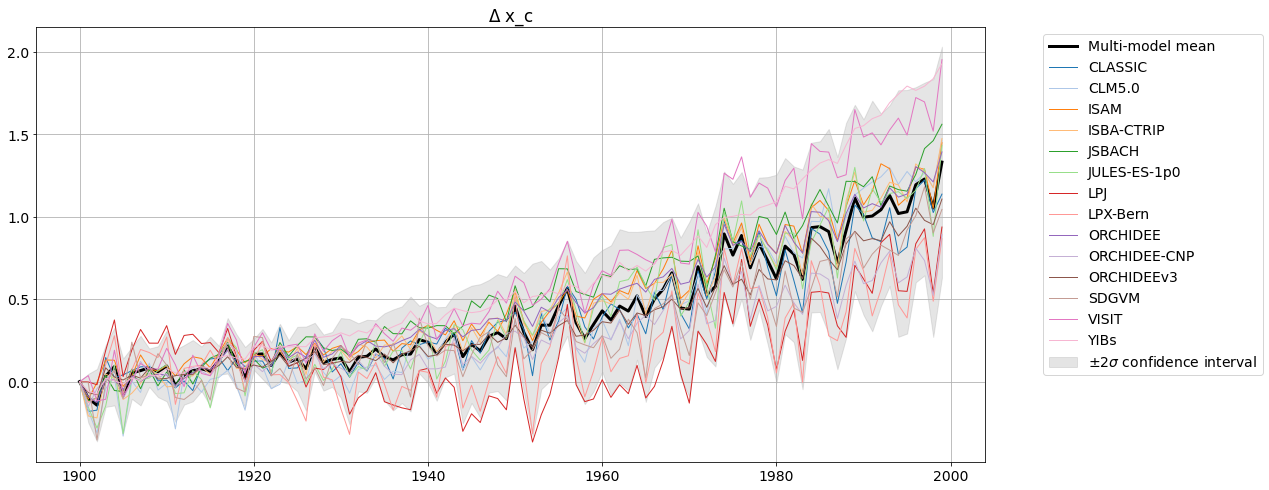

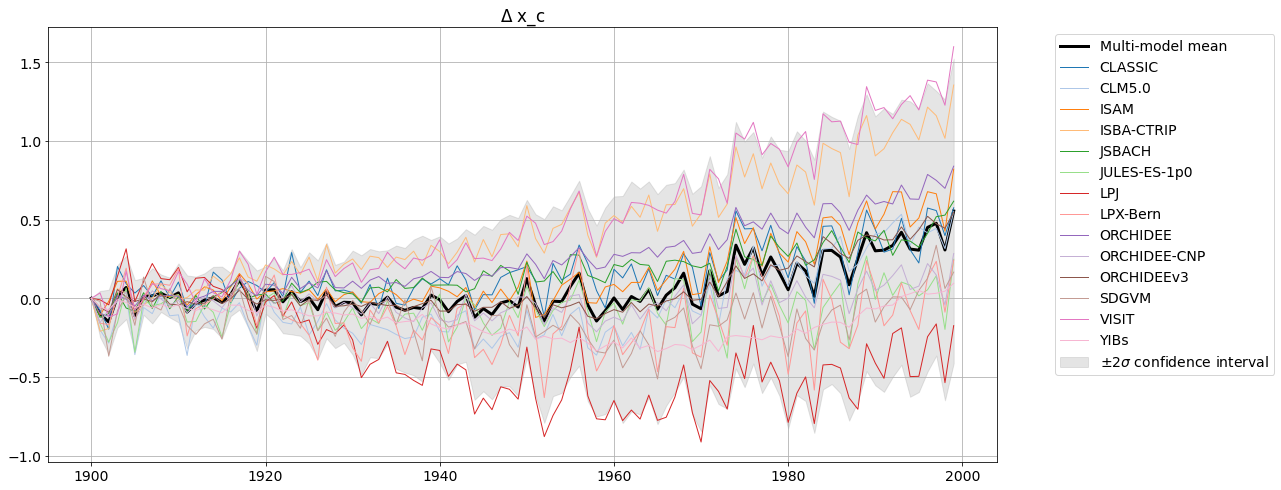

In [346]:
x_c1,sigma_x_c1=gh.plot_traceable_component(
    all_comp_dict_S2,
    "x_c",
    model_cols,
    delta=True,
)
x_c2,sigma_x_c2=gh.plot_traceable_component(
    all_comp_dict_S3,
    "x_c",
    model_cols,
    delta=True,
)

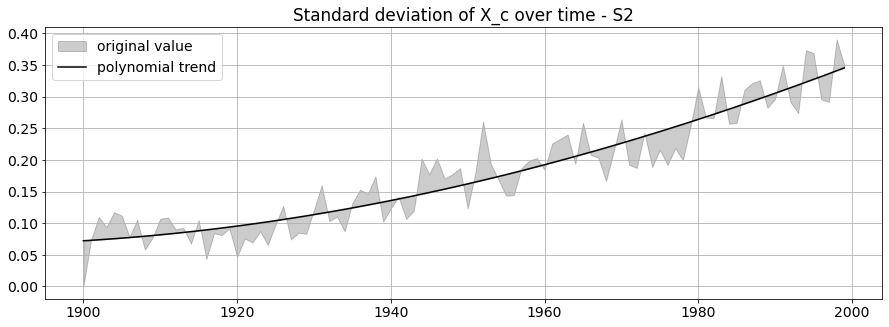

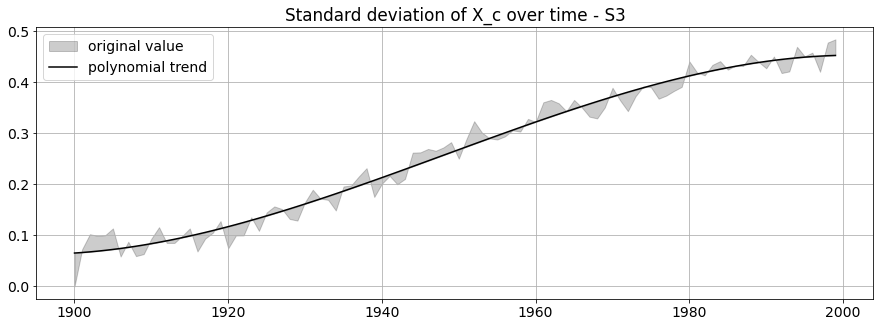

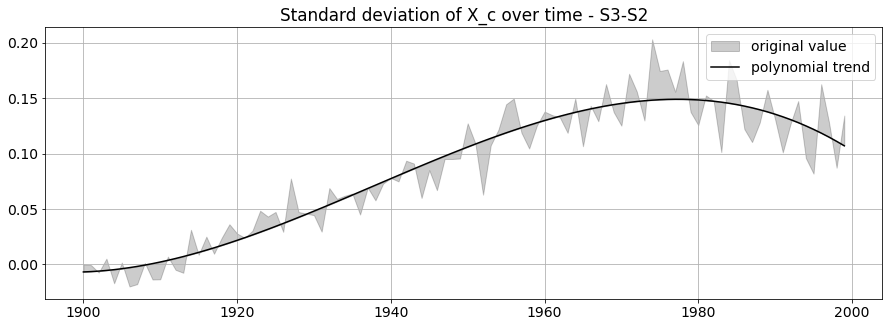

In [347]:
times=all_comp_dict_S2["Times"]
var=sigma_x_c1
gh.plot_single_trend(var,times,3,"Standard deviation of X_c over time - S2")

times=all_comp_dict_S3["Times"]
var=sigma_x_c2
gh.plot_single_trend(var,times,3, "Standard deviation of X_c over time - S3")

times=all_comp_dict_S3["Times"]
var=sigma_x_c2-sigma_x_c1
gh.plot_single_trend(var,times,3, "Standard deviation of X_c over time - S3-S2")

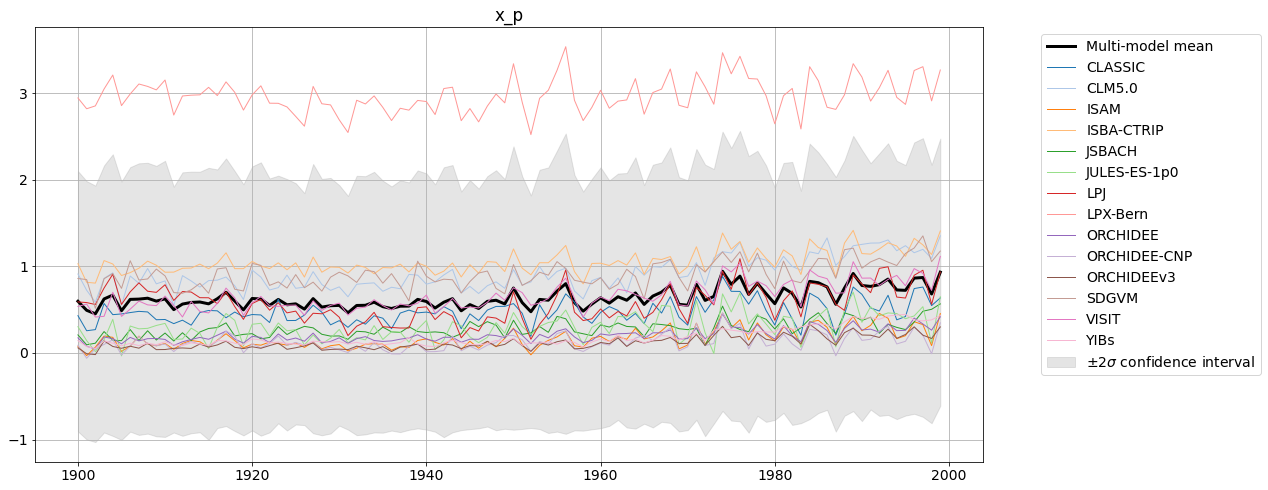

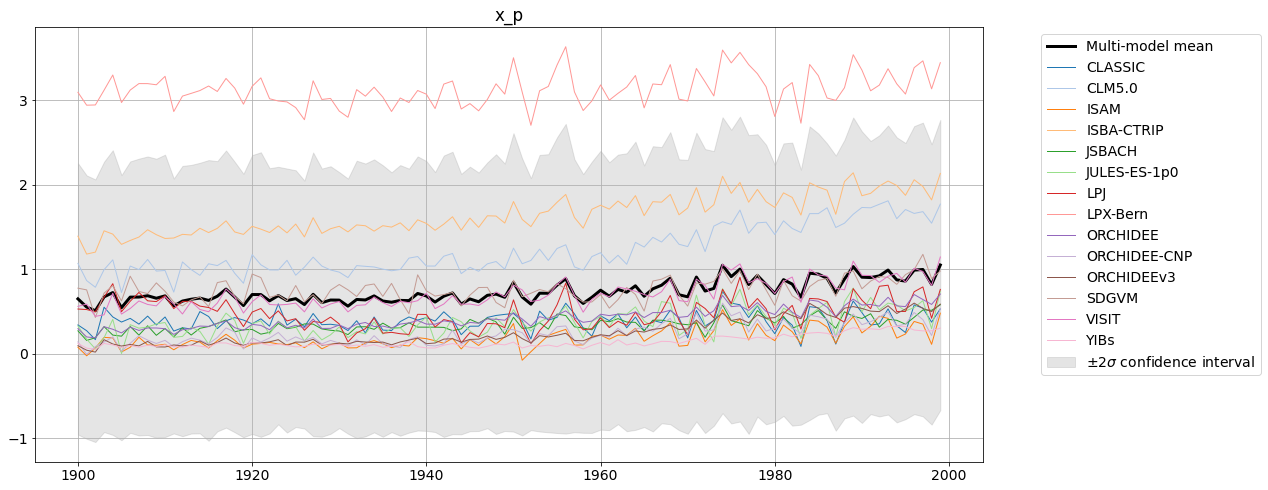

In [348]:
x_p1,sigma_x_p1=gh.plot_traceable_component(
    all_comp_dict_S2,
    "x_p",
    model_cols,
    #delta=True,
)
x_p2,sigma_x_p2=gh.plot_traceable_component(
    all_comp_dict_S3,
    "x_p",
    model_cols,
    #delta=True,
)

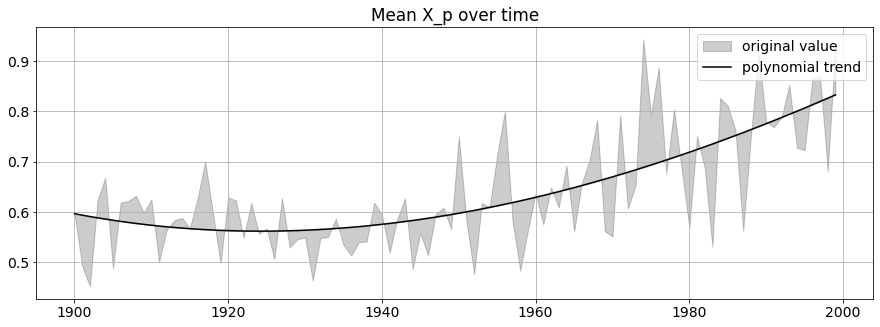

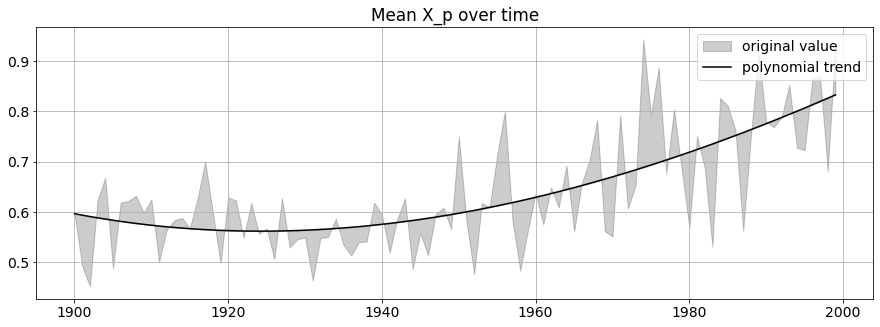

In [349]:
times=all_comp_dict_S2["Times"]
var=x_p1
gh.plot_single_trend(var,times,3,"Mean X_p over time")
times=all_comp_dict_S3["Times"]
var=x_p1
gh.plot_single_trend(var,times,3,"Mean X_p over time")

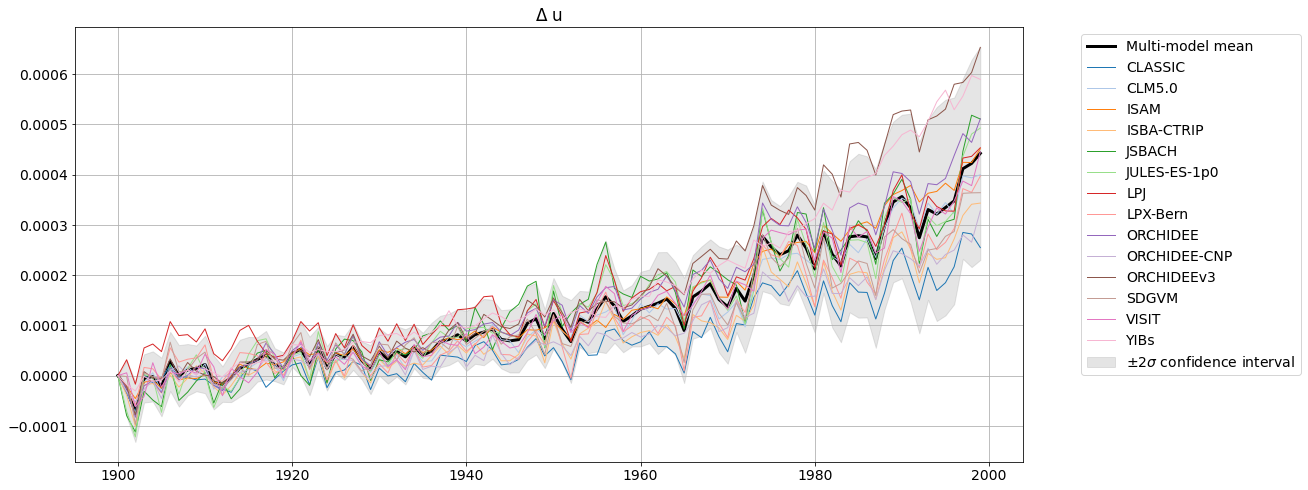

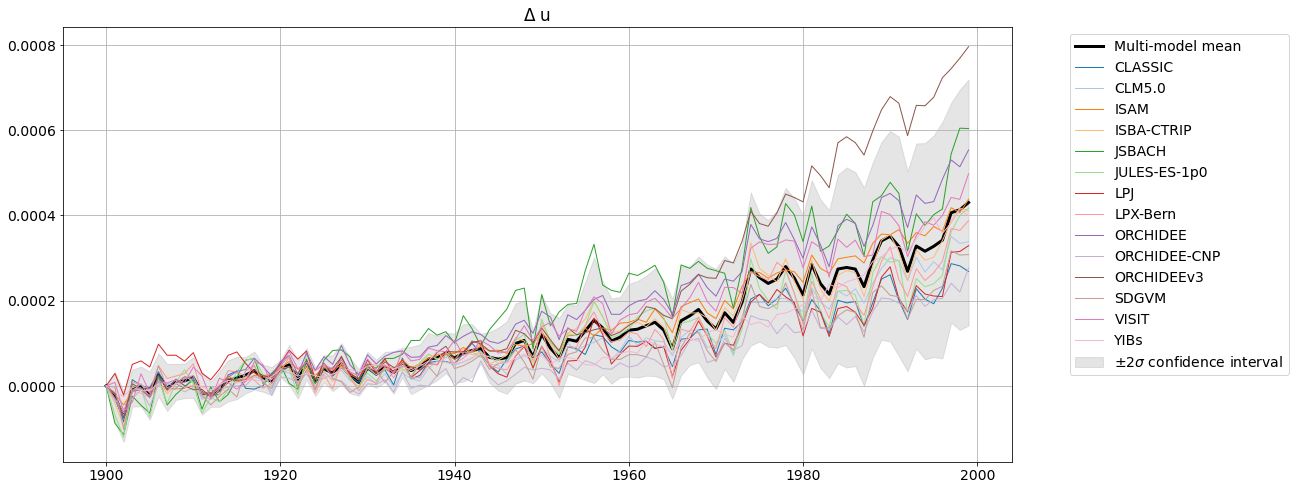

In [350]:
u1, sigma_u1=gh.plot_traceable_component(
    all_comp_dict_S2,
    "u",
    model_cols,
    delta=True,
)
u2, sigma_u2=gh.plot_traceable_component(
    all_comp_dict_S3,
    "u",
    model_cols,
    delta=True,
)

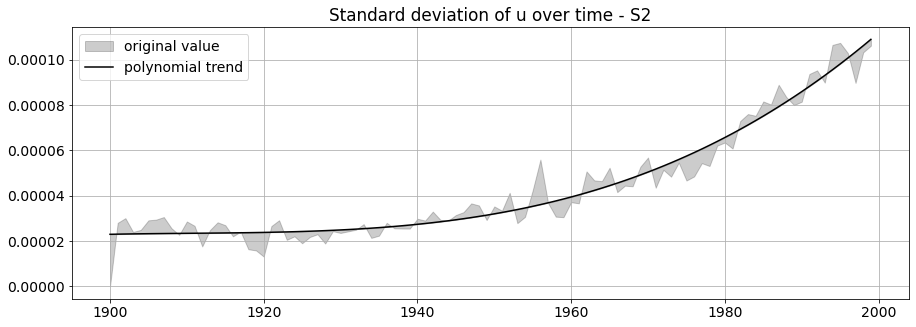

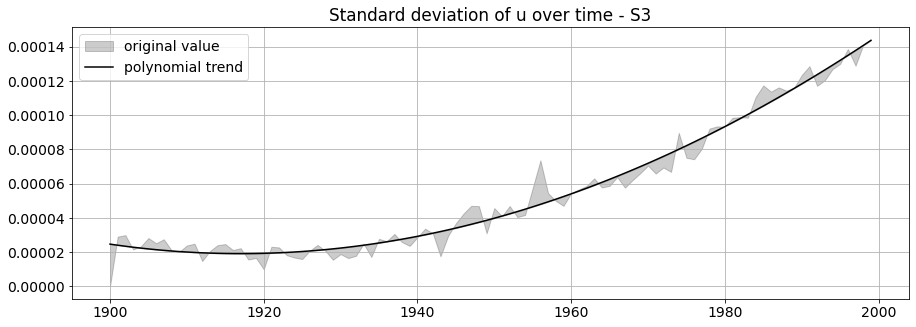

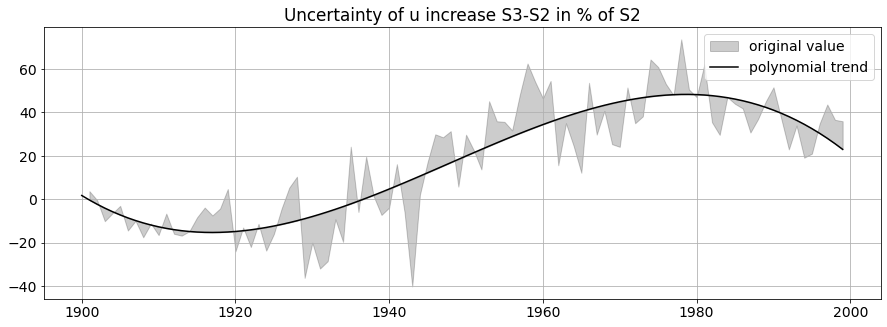

In [351]:
times=all_comp_dict_S2["Times"]
var=sigma_u1
gh.plot_single_trend(var,times,3,"Standard deviation of u over time - S2")

times=all_comp_dict_S3["Times"]
var=sigma_u2
gh.plot_single_trend(var,times,3, "Standard deviation of u over time - S3")

times=all_comp_dict_S3["Times"]
var=(sigma_u2-sigma_u1)/sigma_u1*100
gh.plot_single_trend(var,times,3, "Uncertainty of u increase S3-S2 in % of S2")

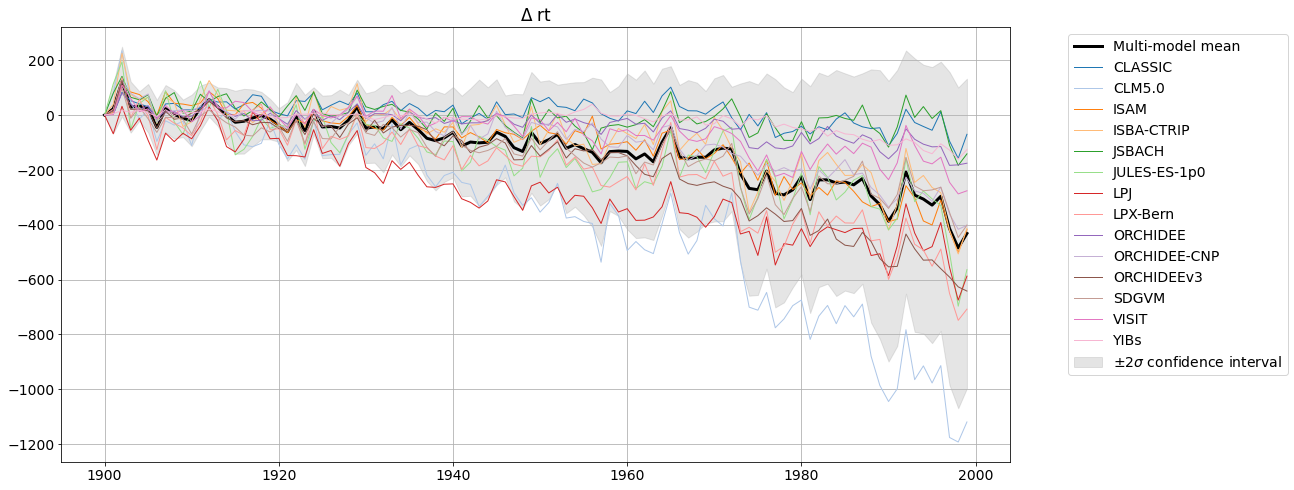

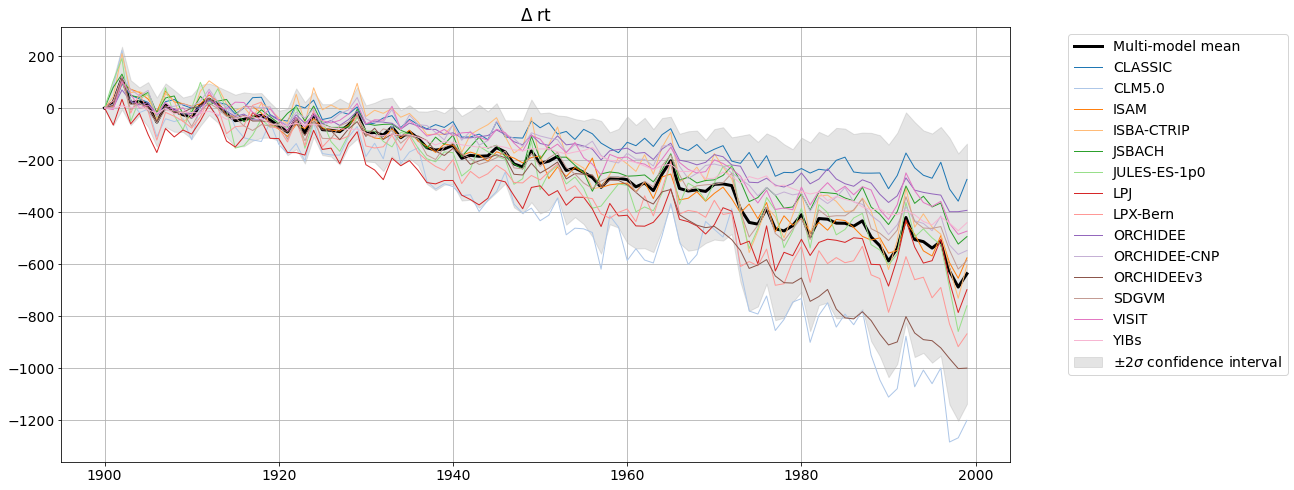

In [352]:
rt1,sigma_rt1=gh.plot_traceable_component(
    all_comp_dict_S2,
    "rt",
    model_cols,
    delta=True,
)
rt2,sigma_rt2=gh.plot_traceable_component(
    all_comp_dict_S3,
    "rt",
    model_cols,
    delta=True,
)

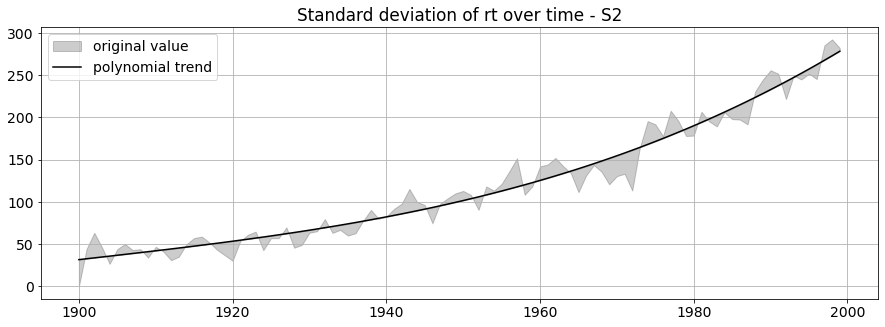

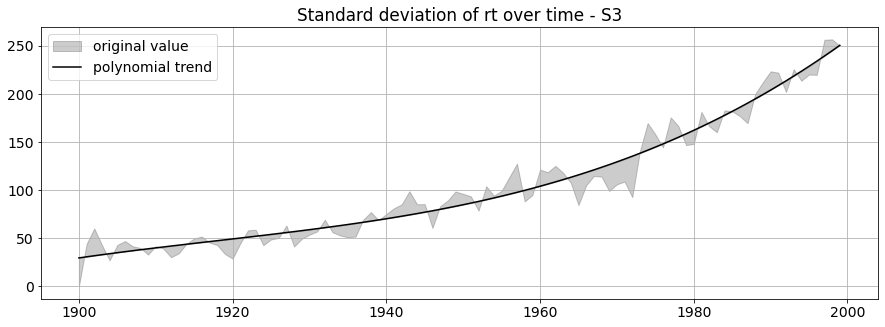

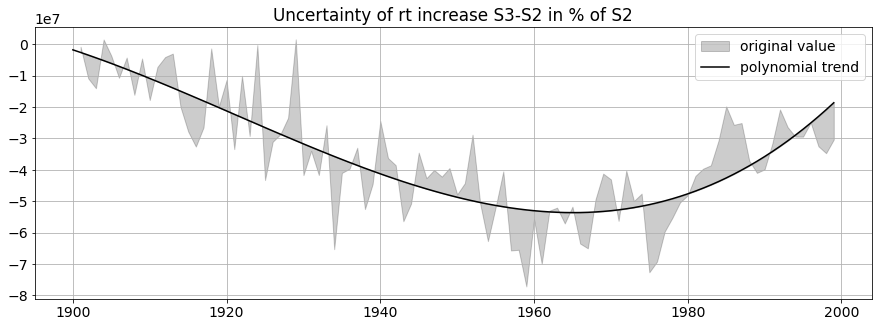

In [353]:
times=all_comp_dict_S2["Times"]
var=sigma_rt1
gh.plot_single_trend(var,times,3,"Standard deviation of rt over time - S2")

times=all_comp_dict_S3["Times"]
var=sigma_rt2
gh.plot_single_trend(var,times,3, "Standard deviation of rt over time - S3")

times=all_comp_dict_S3["Times"]
var=(sigma_rt2-sigma_rt1)/sigma_u1*100
gh.plot_single_trend(var,times,3, "Uncertainty of rt increase S3-S2 in % of S2")

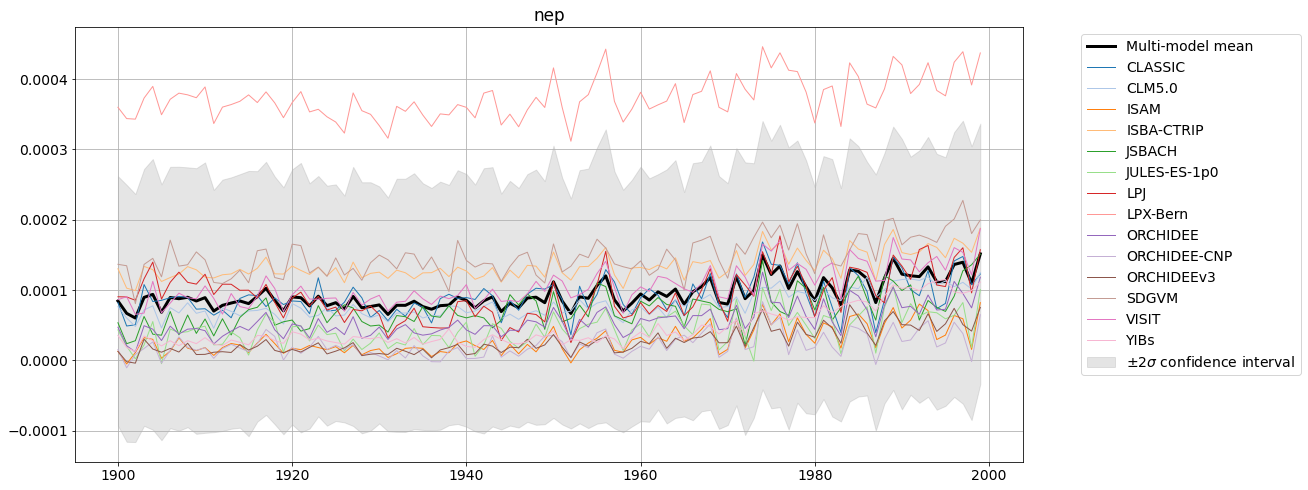

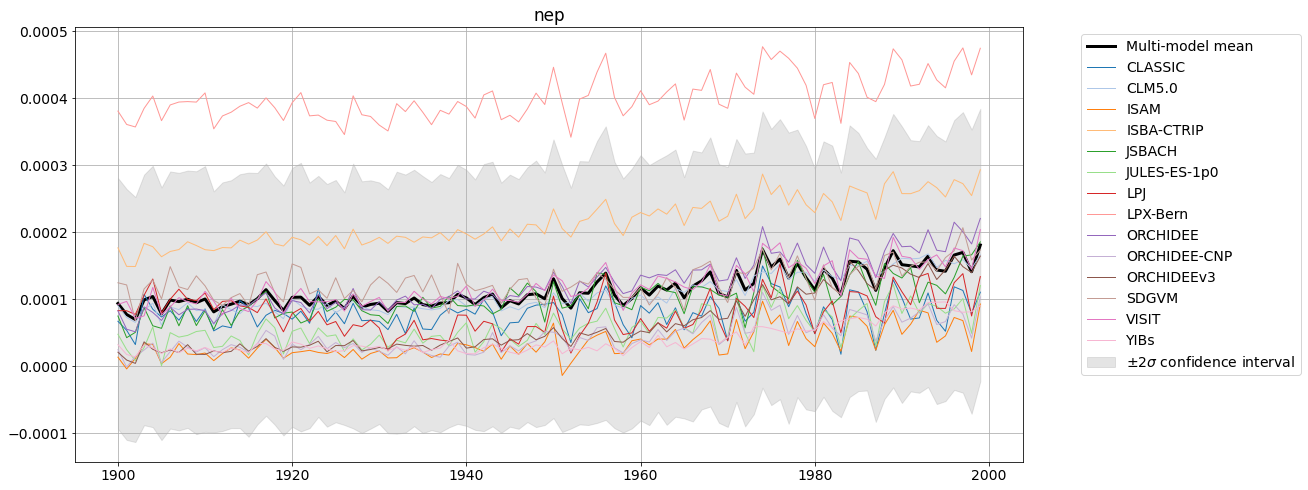

In [354]:
nep1,sigma_nep1=gh.plot_traceable_component(
    all_comp_dict_S2,
    "nep",
    model_cols,
    #delta=True,
)
nep2,sigma_nep2=gh.plot_traceable_component(
    all_comp_dict_S3,
    "nep",
    model_cols,
    #delta=True,
)

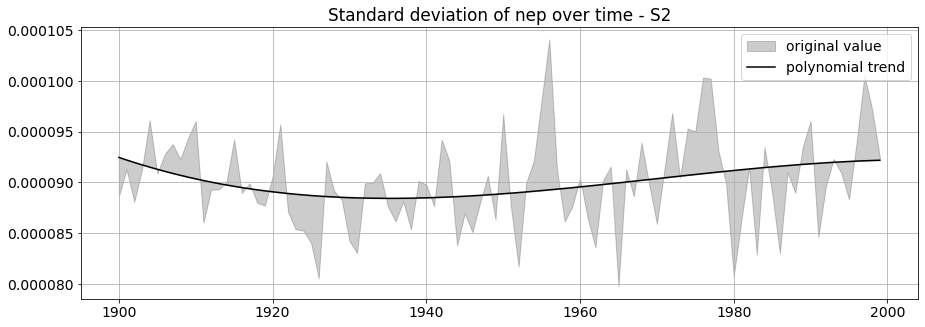

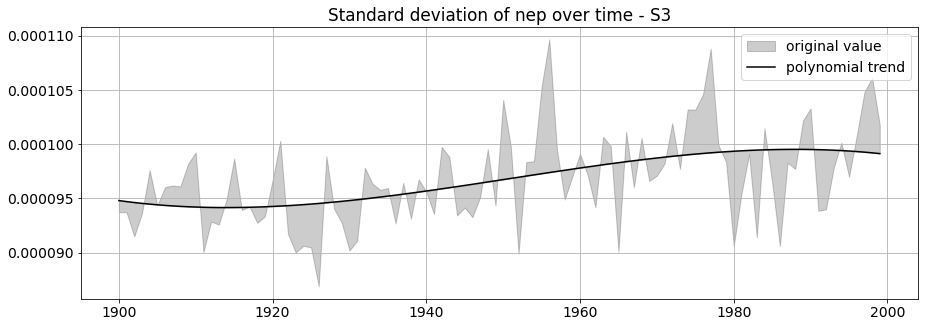

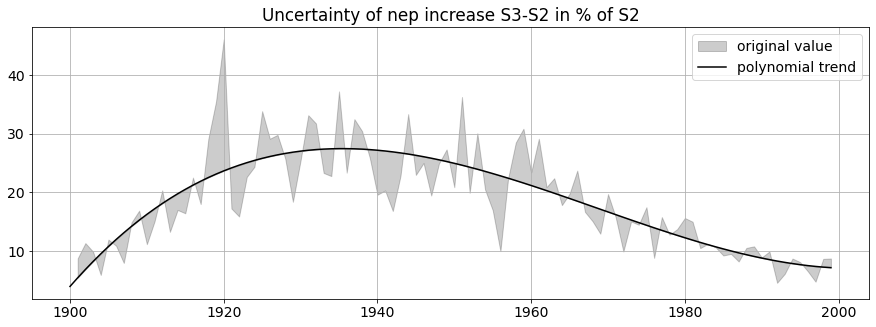

In [355]:
times=all_comp_dict_S2["Times"]
var=sigma_nep1
gh.plot_single_trend(var,times,3,"Standard deviation of nep over time - S2")

times=all_comp_dict_S3["Times"]
var=sigma_nep2
gh.plot_single_trend(var,times,3, "Standard deviation of nep over time - S3")

times=all_comp_dict_S3["Times"]
var=(sigma_nep2-sigma_nep1)/sigma_u1*100
gh.plot_single_trend(var,times,3, "Uncertainty of nep increase S3-S2 in % of S2")

### Uncertainty attribution

In [356]:
plt.rcParams.update({'font.size': 12})

Attribution of summed deviations from the mean for all models to the differences in traceable components


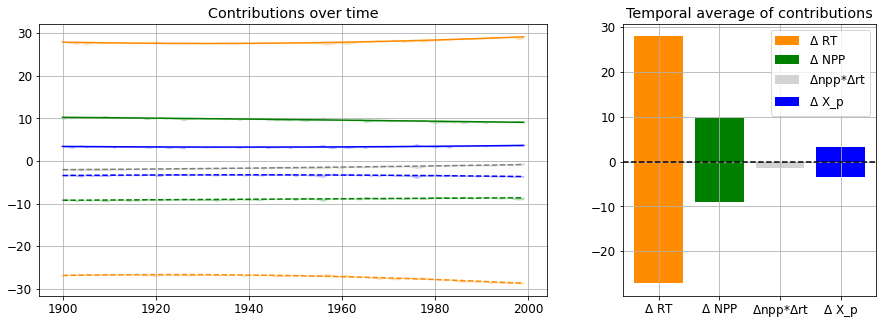

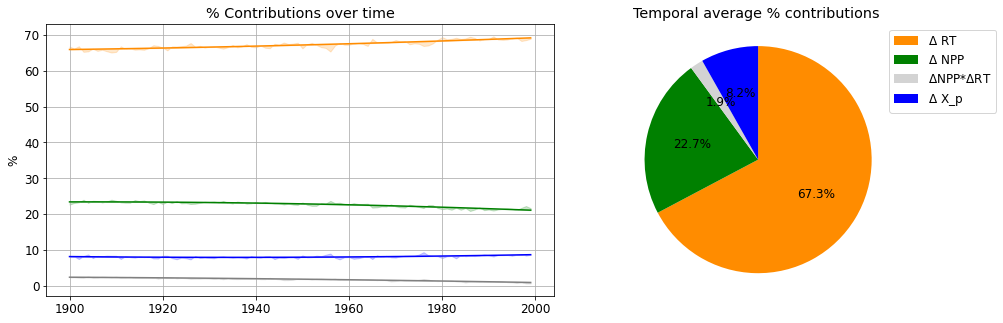

Attribution of summed deviations from the mean for all models to the differences in traceable components


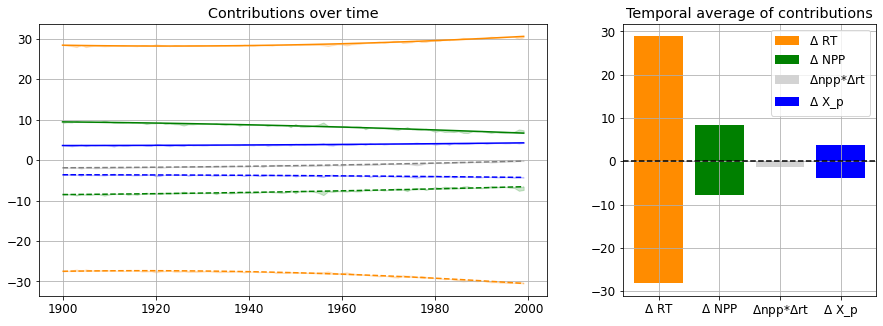

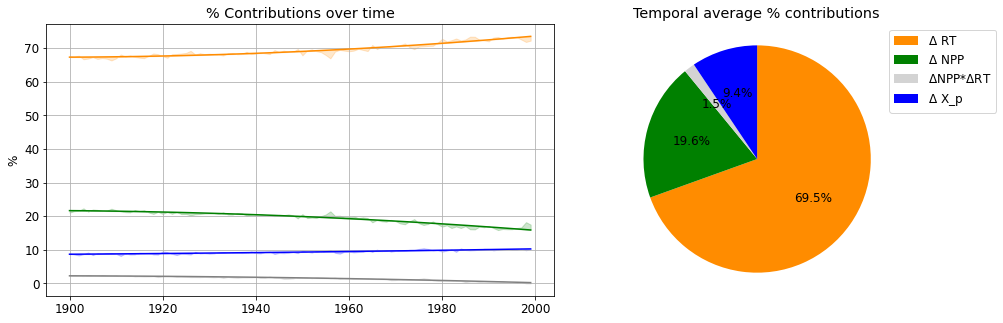

In [361]:
gh.plot_attribution_sum (
    all_comp_dict=all_comp_dict_S2,
    percent=True,
    part=1,
)
gh.plot_attribution_sum (
    all_comp_dict=all_comp_dict_S3,
    percent=True,
    part=1,
)